# Importing the libraries

In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [26]:
df=pd.read_csv('diabetes_prediction_dataset.csv')
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


# Data cleaning

In [27]:
df.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [29]:
df.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


In [30]:
df[['age','hypertension','heart_disease','bmi','HbA1c_level','blood_glucose_level','diabetes']].corr()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
age,1.000000,0.251171,0.233354,0.337396,0.101354,0.110672,0.258008
hypertension,0.251171,1.000000,0.121262,0.147666,0.080939,0.084429,0.197823
heart_disease,0.233354,0.121262,1.000000,0.061198,0.067589,0.070066,0.171727
bmi,0.337396,0.147666,0.061198,1.000000,0.082997,0.091261,0.214357
HbA1c_level,0.101354,0.080939,0.067589,0.082997,1.000000,0.166733,0.400660
blood_glucose_level,0.110672,0.084429,0.070066,0.091261,0.166733,1.000000,0.419558
diabetes,0.258008,0.197823,0.171727,0.214357,0.400660,0.419558,1.000000


# Distribution of Diabetes Cases by Age

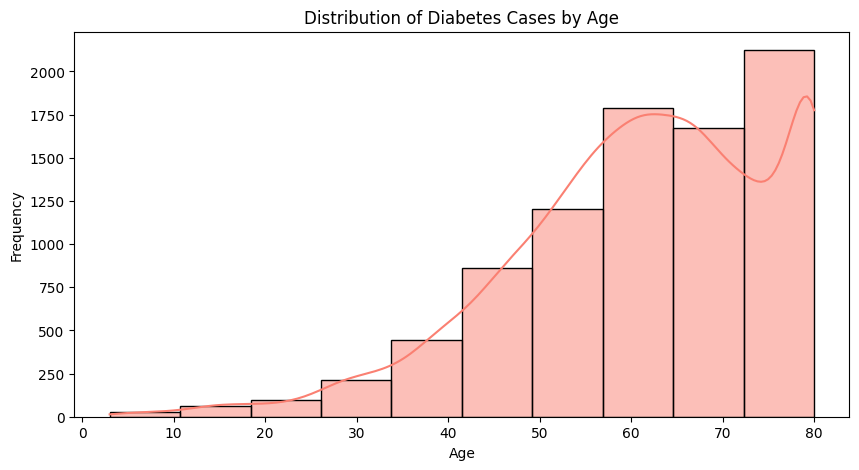

In [31]:
plt.figure(figsize=(10,5))
sns.histplot(data=df,x=df[df['diabetes'] == 1]['age'],bins=10,kde=True,color='salmon')
plt.title("Distribution of Diabetes Cases by Age")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

# Diabetes count according to smoking history and gender

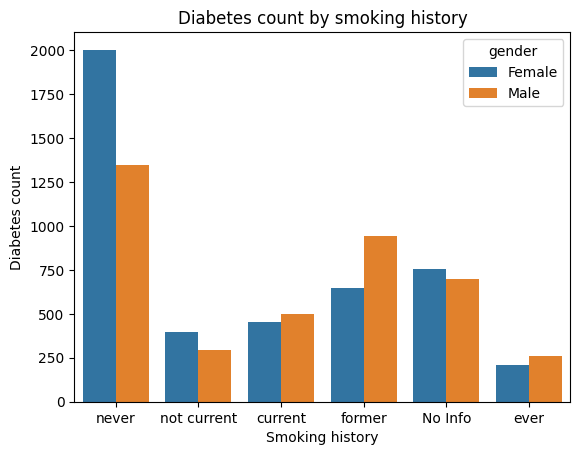

In [32]:
sns.countplot(data=df[df['diabetes']==1], x='smoking_history', hue='gender')
plt.title('Diabetes count by smoking history')
plt.xlabel('Smoking history')
plt.ylabel('Diabetes count')
plt.xticks()
plt.show()

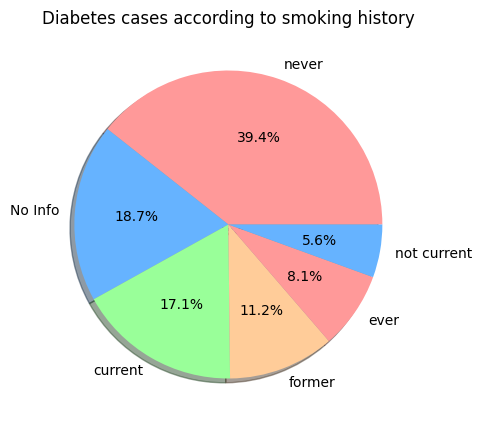

In [33]:
plt.figure(figsize=(10, 5))
plt.pie(df[df['diabetes'] == 1]['smoking_history'].value_counts(),autopct='%1.1f%%',labels=df['smoking_history'].unique(),shadow=True,colors=['#ff9999','#66b3ff','#99ff99','#ffcc99'])
plt.title('Diabetes cases according to smoking history')
plt.show()

In [34]:
num_df=df.drop(columns=['gender','smoking_history'])

In [35]:
corr=num_df.corr()

<Axes: >

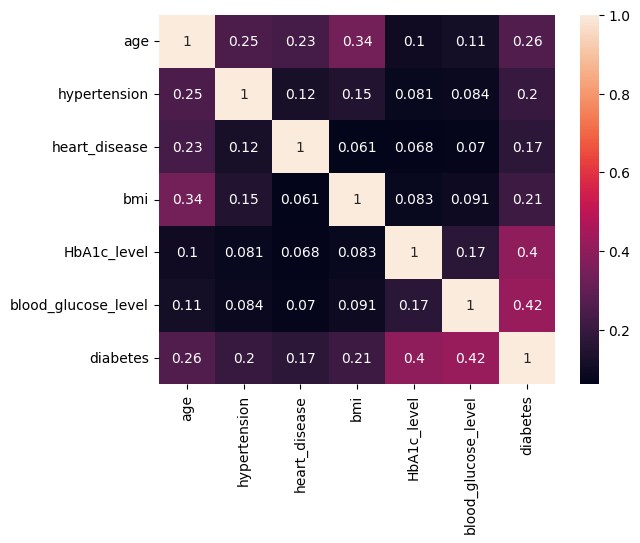

In [36]:
sns.heatmap(corr,annot=True)

In [37]:
data=df[df['diabetes'] == 1]['gender'].value_counts()
label=df[df['diabetes'] == 1]['gender'].value_counts().index

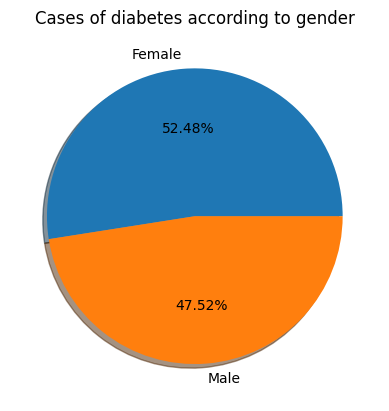

In [38]:
plt.pie(data,labels=label,autopct="%0.2f%%",shadow=True)
plt.title('Cases of diabetes according to gender')

plt.show()

# Blood glucose level of diabetic patients across various ages

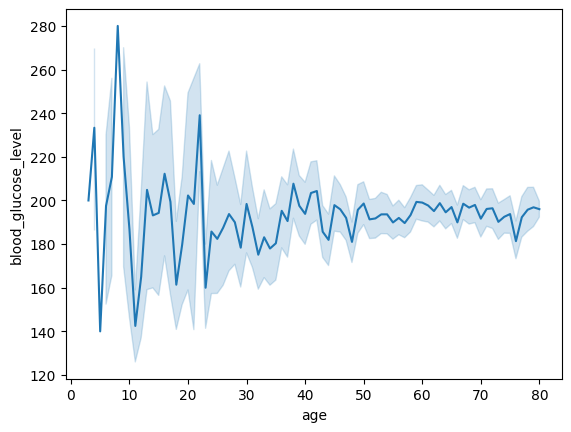

In [39]:
diabetic = df[df['diabetes'] == 1]

sns.lineplot(data=diabetic,x='age',y='blood_glucose_level')

plt.show()

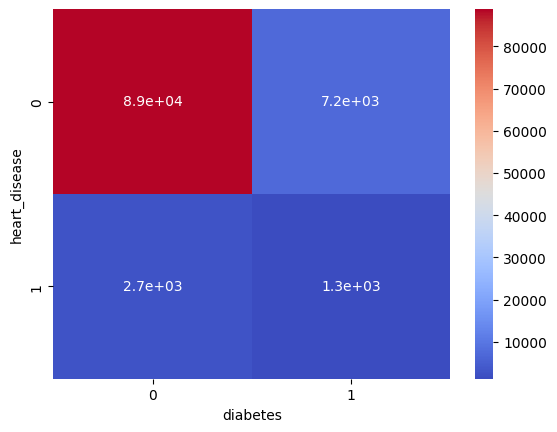

In [40]:
cross=pd.crosstab(df['heart_disease'],df['diabetes'])

sns.heatmap(cross,annot=True,cmap='coolwarm')

plt.show()

# Heart Disease vs Hypertension in Diabetic Patients

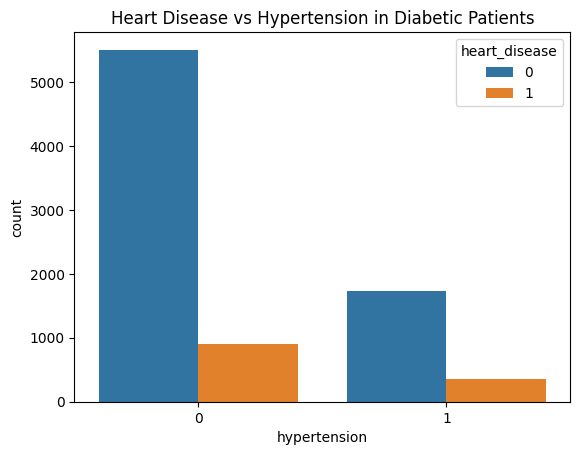

In [41]:
sns.countplot(data=df[df['diabetes']==1],x='hypertension',hue='heart_disease')
plt.title("Heart Disease vs Hypertension in Diabetic Patients")
plt.show()

# Predicting chance of diabetes according to age,hypertension,heart_disease,bmi,HbA1c_level, and blood_glucose_level	

In [42]:
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [43]:
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [44]:
df['gender']=df['gender'].map({'Male': 0, 'Female': 1, 'Others': 2})

In [45]:
df['smoking_history']=df['smoking_history'].map({
    "never": 0,
    "current": 1,
    "not current": 2,
    "ever": 3,
    "former": 4,
    "No Info": 5
})

In [46]:
df['smoking_history'].unique()

array([0, 5, 1, 4, 3, 2])

# importing the models

In [60]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import recall_score,confusion_matrix,ConfusionMatrixDisplay,f1_score

In [48]:
X=df.drop(columns='diabetes')
y=df['diabetes']

In [49]:
y

0        0
1        0
2        0
3        0
4        0
        ..
99995    0
99996    0
99997    0
99998    0
99999    0
Name: diabetes, Length: 100000, dtype: int64

In [50]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [51]:
model = RandomForestClassifier(n_estimators=100)

In [52]:
model.fit(X_train,y_train)

RandomForestClassifier()

In [53]:
y_pred=model.predict(X_test)

In [54]:
recall_score(y_test,y_pred)

0.6835492736552807

In [61]:
f1_score(y_test,y_pred)

0.7964318389752973

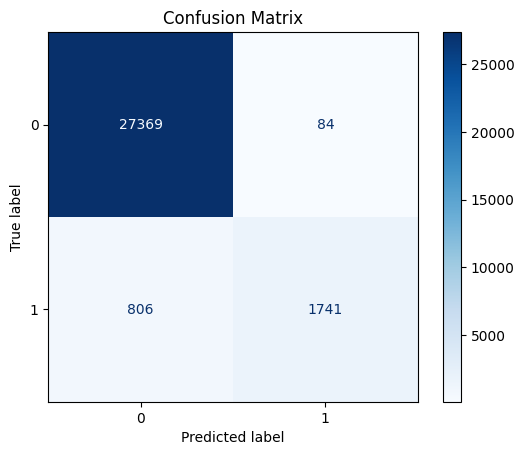

In [92]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap="Blues")
plt.title("Confusion Matrix")

plt.savefig('confusionmatrixplot.png', bbox_inches='tight')

In [56]:
import pickle

In [57]:
pickle.dump(model, open("model.pkl", "wb"))

In [58]:
df

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,1.0,80.0,0,1,0,25.19,6.6,140,0
1,1.0,54.0,0,0,5,27.32,6.6,80,0
2,0.0,28.0,0,0,0,27.32,5.7,158,0
3,1.0,36.0,0,0,1,23.45,5.0,155,0
4,0.0,76.0,1,1,1,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99995,1.0,80.0,0,0,5,27.32,6.2,90,0
99996,1.0,2.0,0,0,5,17.37,6.5,100,0
99997,0.0,66.0,0,0,4,27.83,5.7,155,0
99998,1.0,24.0,0,0,0,35.42,4.0,100,0


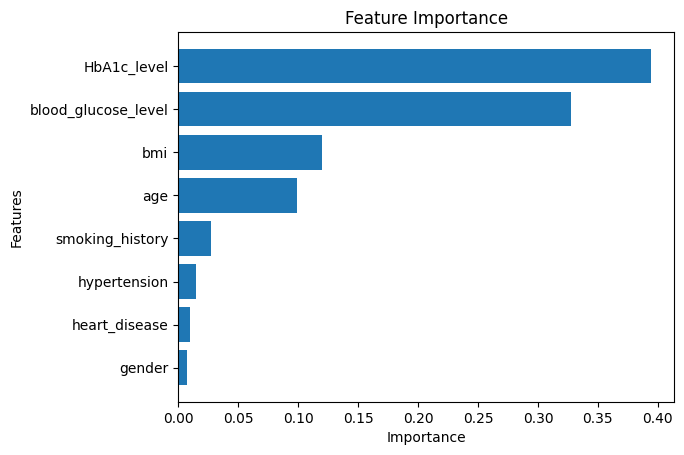

In [107]:
importances = model.feature_importances_
indices = np.argsort(importances)[::]  # Sort in descending order

# Plotting
plt.title("Feature Importance")
plt.barh(range(X.shape[1]),importances[indices] )
plt.yticks(range(X.shape[1]),X.columns[indices])
plt.ylabel("Features")
plt.xlabel("Importance")


plt.savefig('feature_importance_plot.png', bbox_inches='tight')

In [97]:
x=df[['HbA1c_level','blood_glucose_level','bmi','age']]

In [98]:
x_tr,x_tes,y_tr,y_tes=train_test_split(x,y,test_size=0.3,random_state=42)

In [99]:
mymodel=RandomForestClassifier(n_estimators=100)

In [100]:
mymodel.fit(x_tr,y_tr)

RandomForestClassifier()

In [102]:
ypr=mymodel.predict(x_tes)

In [103]:
recall_score(y_tes,ypr)

0.6862976050255202

In [105]:
cm=confusion_matrix(y_tes,ypr)
cm

array([[27262,   191],
       [  799,  1748]])

In [106]:
f1_score(y_tes,ypr)

0.7793134195274186